## Pràctica 10 - Time series amb PH

En aquesta pràctica veurem el cas d'ús més generalitzat del TDA: la clasificació de sèries temporals.

In [186]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Avui veurem com el concepte de *forma* també té sentit en el cas de sèries temporals. De fet, és ben clar. Si mirem les sèries temporals ```simple_wave.csv``` i ```complex_wave.csv``` és evident a ull que aquestes tenen una forma molt diferent.

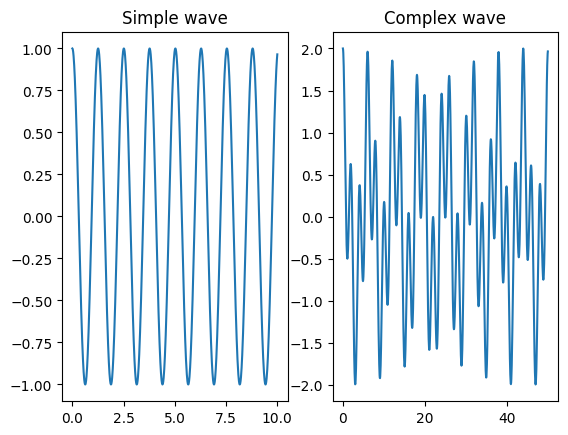

In [187]:
simple_wave = pd.read_csv("data/simple_wave.csv")
complex_wave = pd.read_csv("data/complex_wave.csv")
fig, axs = plt.subplots(1, 2)
axs[0].plot(simple_wave["x"], simple_wave["y"])
axs[0].set_title("Simple wave")
axs[1].plot(complex_wave["x"], complex_wave["y"])
axs[1].set_title("Complex wave")
plt.show()

Igual d'evident que ho és el fet de que ```another_simple_wave.csv``` té la mateixa forma que ```simple_wave.csv```.

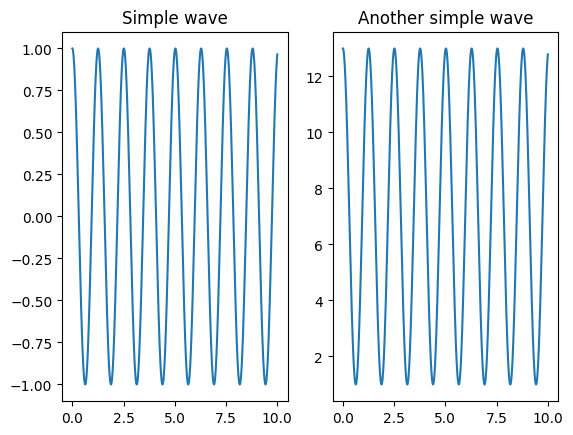

In [188]:
another_simple_wave = pd.read_csv("data/another_simple_wave.csv")
fig, axs = plt.subplots(1, 2)
axs[0].plot(simple_wave["x"], simple_wave["y"])
axs[0].set_title("Simple wave")
axs[1].plot(another_simple_wave["x"], another_simple_wave["y"])
axs[1].set_title("Another simple wave")
plt.show()

Tot i que no s'assemblin gens numèricament ja que tenen escales diferents i estàn centrades en punts diferents.

Podríem pensar que la homologia persistent de poc ens servirà en aquest cas, ja que, tot i veure que les gràfiques tenen una forma diferent, homotòpicament són equivalents i serà difícil distingir res en diagrames de persistència.

Hi ha un petit truc, però, que ens converteix sèries temporals en subespais plens de forats: els **time delay embeddings**.

**A la sèrie temporal ```simple_wave```, construiu unes columnes ```embedding_x``` i ```embedding_y``` que continguin el valor de la sèrie temporal en l'instant donat, i el valor posterior en la sèrie.**

**Dibuixeu un plot amb les coordenades obtingudes.**

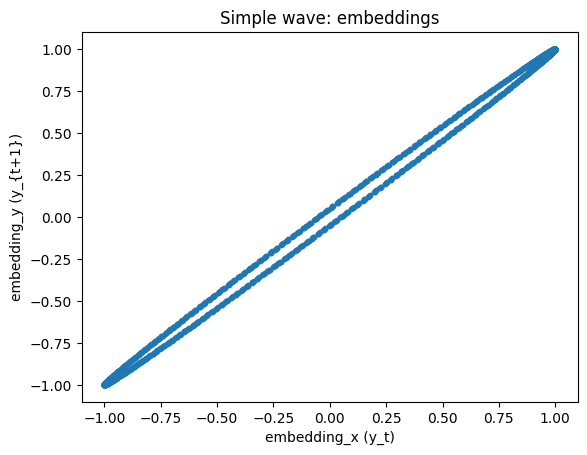

In [189]:
simple_wave_emb = pd.DataFrame({
    "embedding_x": simple_wave["y"][:-1].reset_index(drop=True) ,
    "embedding_y": simple_wave["y"][1:].reset_index(drop=True),
})

fig, ax = plt.subplots()
ax.scatter(simple_wave_emb["embedding_x"], simple_wave_emb["embedding_y"], s=10)
ax.set_xlabel("embedding_x (y_t)")
ax.set_ylabel("embedding_y (y_{t+1})")
ax.set_title("Simple wave: embeddings")
plt.show()

El resultat és una circumferència al pla $\mathbb{R}^2$. Bé, no es una circumferència molt perfecta, està bastant deformada... Però això ja no ens importa perquè som topòlegs, oi? Té un forat (de dimensió 1) i això és l'únic que ens importa.

**Què passa si com a coordenada ```embedding_y``` prenem no el valor posterior, sino el 10 vegades posterior?**

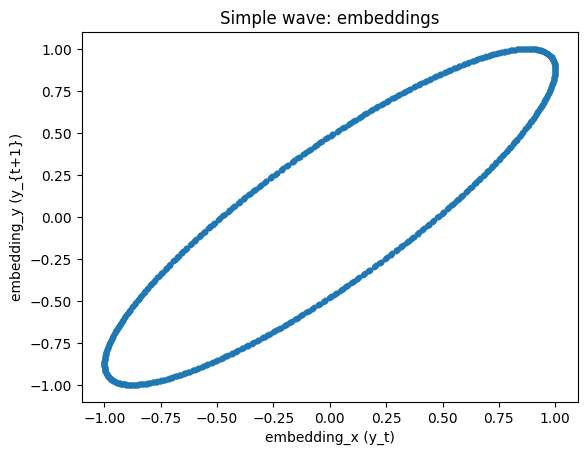

In [190]:
simple_wave_emb = pd.DataFrame({
    "embedding_x": simple_wave["y"][:-10].reset_index(drop=True) ,
    "embedding_y": simple_wave["y"][10:].reset_index(drop=True),
})

fig, ax = plt.subplots()
ax.scatter(simple_wave_emb["embedding_x"], simple_wave_emb["embedding_y"], s=10)
ax.set_xlabel("embedding_x (y_t)")
ax.set_ylabel("embedding_y (y_{t+1})")
ax.set_title("Simple wave: embeddings")
plt.show()

**Feu el mateix amb l'altra sèrie temporal: ```complex_wave```. Preneu també un step 10 per simplicitat gràfica.**

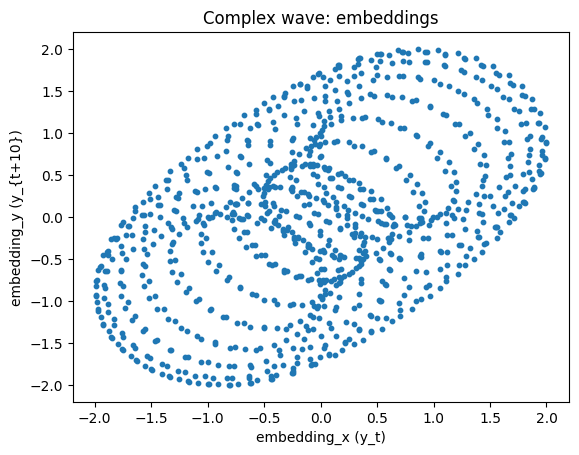

In [191]:
complex_wave_emb = pd.DataFrame({
    "embedding_x": complex_wave["y"][:-10].reset_index(drop=True) ,
    "embedding_y": complex_wave["y"][10:].reset_index(drop=True),
})

fig, ax = plt.subplots()
ax.scatter(complex_wave_emb["embedding_x"], complex_wave_emb["embedding_y"], s=10)
ax.set_xlabel("embedding_x (y_t)")
ax.set_ylabel("embedding_y (y_{t+10})")
ax.set_title("Complex wave: embeddings")
plt.show()

El que veiem a l'embedding de la ```complex_wave``` és un munt de forats, una cosa molt rica topològicament, i (sobre tot), molt diferent del que vèiem a l'embedding de la ```simple_wave```.

Però això són només embeddings a l'espai $\mathbb{R}^2$. Això es pot fer encara molt més ric si li pugem la dimensió.

**Construiu ara unes columnes ```embedding_x```, ```embedding_y``` i ```embedding_z``` que continguin el valor de la sèrie temporal en l'instant donat, el valor 10 steps posterior en la sèrie, i el valor 20 steps posterior, respectivament.**

**Dibuixeu plots (3D) dels embeddings d'ambdós casos (simple i complex).**

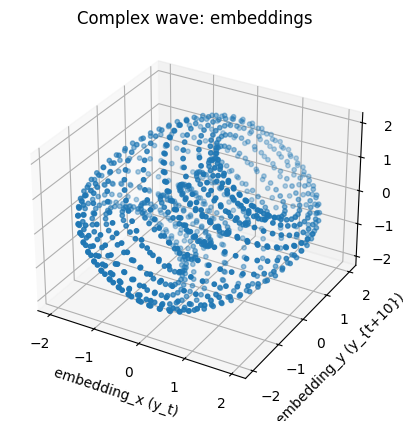

In [192]:
complex_wave_emb = pd.DataFrame({
    "embedding_x": complex_wave["y"][:-10].reset_index(drop=True) ,
    "embedding_y": complex_wave["y"][10:].reset_index(drop=True),
    "embedding_z": complex_wave["y"][20:].reset_index(drop=True),
})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(complex_wave_emb["embedding_x"], complex_wave_emb["embedding_y"], complex_wave_emb["embedding_z"], s=10)
ax.set_xlabel("embedding_x (y_t)")
ax.set_ylabel("embedding_y (y_{t+10})")
ax.set_zlabel("embedding_z (y_{t+20})")
ax.set_title("Complex wave: embeddings")
plt.show()

Evidentment, podríem de la mateixa forma crear embeddings sobre qualsevol dimensió de la mateixa forma. No ho farem aquí per poder seguir dibuixant-los, però podríem.

**Dibuixeu el time delay embedding de ```another_simple_wave``` i comproveu que efectivament té la forma que esperem.**

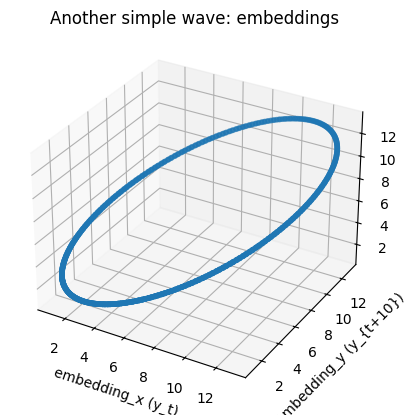

In [193]:
another_simple_wave_emb = pd.DataFrame({
    "embedding_x": another_simple_wave["y"][:-10].reset_index(drop=True) ,
    "embedding_y": another_simple_wave["y"][10:].reset_index(drop=True),
    "embedding_z": another_simple_wave["y"][20:].reset_index(drop=True),
})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(another_simple_wave_emb["embedding_x"], another_simple_wave_emb["embedding_y"], another_simple_wave_emb["embedding_z"], s=10)
ax.set_xlabel("embedding_x (y_t)")
ax.set_ylabel("embedding_y (y_{t+10})")
ax.set_title("Another simple wave: embeddings")
plt.show()

Suposo que a aquestes alçades ja veieu per on van els tirs.

**Calculeu el diagrama de persistència a partir dels embedding 3D de les tres sèries temporals donades.**

*Hint: Samplejeu cadascuna de les sèries temporals amb fracció 0.1 per no fregir els vostres ordinadors. També haureu de treure els valors extrems del time delay embedding que contenen NaN's*

In [194]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

simple_wave_cloud = simple_wave_emb.dropna().to_numpy()[::10]
complex_wave_cloud = complex_wave_emb.dropna().to_numpy()[::10]
another_simple_wave_cloud = another_simple_wave_emb.dropna().to_numpy()[::10]

VR = VietorisRipsPersistence(metric="euclidean")
simple_wave_diagrams = VR.fit_transform([simple_wave_cloud])
plot_diagram(simple_wave_diagrams[0])

In [195]:
complex_wave_diagrams = VR.fit_transform([complex_wave_cloud])
plot_diagram(complex_wave_diagrams[0])

In [196]:
another_simple_wave_diagrams = VR.fit_transform([another_simple_wave_cloud])
plot_diagram(another_simple_wave_diagrams[0])

Tot el que hem implementat manualment fins aquí està disponible a la llibreria ```giotto-tda```. L'eina per a construir el time delay embedding és la classe ```TakensEmbedding```.

In [197]:
from gtda.time_series import TakensEmbedding

embedder = TakensEmbedding(
    time_delay=3,
    dimension=8,
    stride=10,
)

Aquesta classe s'instancia amb uns quants paràmetres. El paràmetre ```dimension``` defineix la dimensió de l'espai del nostre embedding (com era 2 o 3 en els casos que hem fet a mà), mentre que ```time_delay``` és el nombre de steps que salta d'un punt al posterior (el número 10 que hem utilitzat en l'exemple d'abans). El paràmetre ```stride=10``` farà que només es prengui un punt de cada 10, similar a fer el sampleig de fracció 0.1 que hem fet abans, però agafant-los uniformement cada 10 steps i no de forma random.

L'elecció dels paràmetres ```dimension``` i ```time_delay``` no és pas trivial. Tot i que existeix certa [lliteratura al respecte](https://giotto-ai.github.io/gtda-docs/0.5.1/notebooks/topology_time_series.html#picking-the-embedding-dimension-and-time-delay), el més pràctic és considerar-lo dos hiperparàmetres més com els de qualsevol model, que en el pitjor dels casos es poden optimitzar amb un grid search, si cal.

Ara posarem tot això en pràctica amb un exemple real. Carreguem el dataset ```data/duckduckgeese_train.csv```.

In [198]:
dg_train = pd.read_csv("data/duckgoose_train.csv")
dg_train.sample(5)

,ts0,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,...,ts261,ts262,ts263,ts264,ts265,ts266,ts267,ts268,ts269,y
29,0.071292,0.052861,0.037209,0.055982,0.039792,0.003732,0.073059,0.093256,0.152420,0.141990,...,0.148100,0.123660,0.112040,0.085629,0.053217,0.075502,0.059830,0.027707,0.060668,goose
38,0.278760,0.148210,0.362270,0.251310,0.402030,0.447240,0.299940,0.533530,0.601370,0.254070,...,0.166620,0.450280,0.205570,0.393840,0.260710,0.257270,0.296630,0.127610,0.097150,goose
2,0.009611,0.013726,0.013751,0.008819,0.006286,0.013046,0.050581,0.025978,0.010444,0.031781,...,0.007405,0.003784,0.001477,0.001599,0.000232,0.000355,0.000317,0.000967,0.004392,duck
46,0.118370,0.052061,0.010718,0.008064,0.008720,0.012486,0.072830,0.073588,0.136960,0.388630,...,0.019154,0.012937,0.027613,0.019294,0.018288,0.023223,0.009130,0.008615,0.018935,duck
45,0.024665,0.021685,0.045230,0.022603,0.061030,0.030184,0.068019,0.049184,0.105130,0.041059,...,0.266950,0.036374,0.023390,0.018869,0.009506,0.009991,0.003028,0.005822,0.009236,duck


In [199]:
dg_train.shape

(50, 271)

Aquestes dades estan extretes de 50 gravacions d'aus al sud de Canadà. El nostre target és identificar si es tracta d'un ànec (```duck```) o d'una oca (```goose```). Les dades del dataset original en realitat són més pesades, aquí ja les rebeu tractades (resamplejades a la mateixa freqüència, retallades a la mateixa mida, i espectrografiades a una freqüència concreta) per no trencar-nos massa el cap. També, el target original era de diferents espècies d'ànecs i oques, però ho he passat a binari on ja hi ha una certa predictibilitat.

![Duck or Goose?](data/DuckOrGoose.jpg)

**Dibuixeu algunes d'aquestes sèries temporals. Sabríeu explicar les diferències que es veuen entre una espècie i l'altra?**

C:\Users\laiaq\AppData\Local\Temp\ipykernel_22012\16455620.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



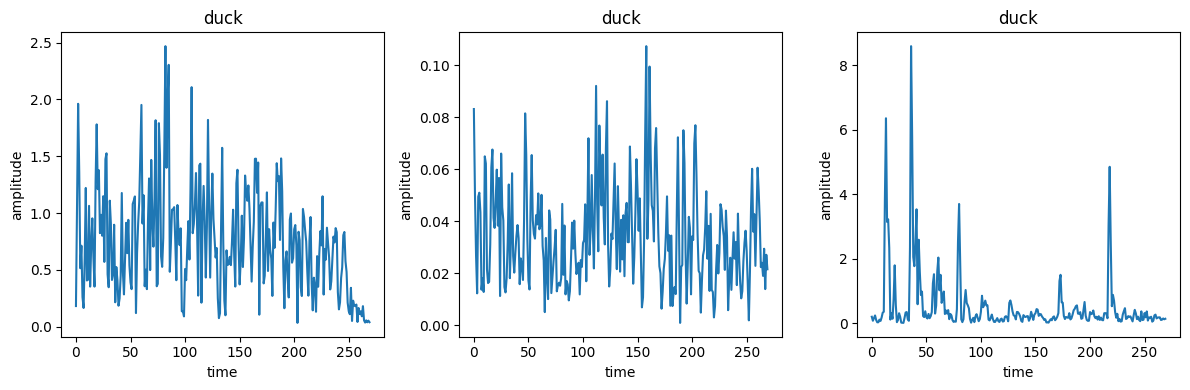

In [200]:
# Sample and plot three time series from the training set
sample = dg_train.sample(3).reset_index(drop=True)

# Use numeric columns as the time-series signal
feature_cols = sample.select_dtypes(include="number").columns

def title_for(i):
    for c in range(3):
        val = sample.iloc[i][-1]
        if isinstance(val, str):
            return str(val)
    return f"Series {i+1}"

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axs[i].plot(sample.iloc[i][feature_cols].to_numpy())
    axs[i].set_title(title_for(i))
    axs[i].set_xlabel("time")
    axs[i].set_ylabel("amplitude")
plt.tight_layout()
plt.show()

**Construiu un model classificador utilitzant tècniques de TDA. Evalueu-lo amb el conjunt de test donat.**

*Hint: Si preneu dimensions altes en l'embedding, no passeu això directament al VietorisRips (massa computació), feu abans una reducció dimensional com per exemple un PCA*

Train shape: (50, 270)
Test shape:  (50, 270)
Classes: ['duck' 'goose']

Training classifier...
Making predictions...

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

        duck       0.70      0.70      0.70        20
       goose       0.80      0.80      0.80        30

    accuracy                           0.76        50
   macro avg       0.75      0.75      0.75        50
weighted avg       0.76      0.76      0.76        50



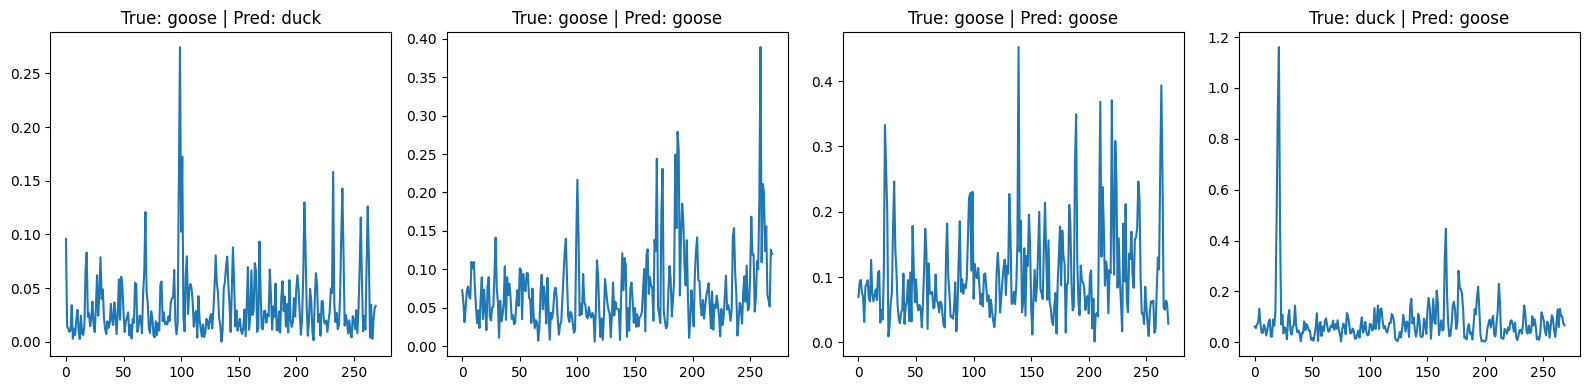

In [201]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from gtda.time_series import TakensEmbedding
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
np.random.seed(42)

dg_test = pd.read_csv("data/duckgoose_test.csv")

X_train = dg_train.iloc[:, :-1].to_numpy()
y_train = dg_train.iloc[:, -1].to_numpy()
X_test = dg_test.iloc[:, :-1].to_numpy()
y_test = dg_test.iloc[:, -1].to_numpy()

print(f"Train shape: {X_train.shape}")
print(f"Test shape:  {X_test.shape}")
print(f"Classes: {np.unique(y_train)}")

class GlobalPCA(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=3):
        self.n_components = n_components
        self.pca = PCA(n_components=n_components, random_state=42)

    def fit(self, X, y=None):
        X_flat = X.reshape(-1, X.shape[-1])
        self.pca.fit(X_flat)
        return self

    def transform(self, X):
        return np.stack([self.pca.transform(x) for x in X])

pipeline = Pipeline(
    steps=[
        ("takens", TakensEmbedding(
            time_delay=10,
            dimension=10,
            stride=1
        )),
        ("pca_global", GlobalPCA(n_components=3)),
        ("vr", VietorisRipsPersistence(
            homology_dimensions=(0, 1, 2),
            n_jobs=-1
        )),
        ("entropy", PersistenceEntropy()),
        ("rf", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            class_weight="balanced",
            max_depth=10,
            n_jobs=-1
        )),
    ]
)

print("\nTraining classifier...")
pipeline.fit(X_train, y_train)

print("Making predictions...")
y_pred = pipeline.predict(X_test)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

n_samples = 4
sample_indices = np.random.choice(len(X_test), size=n_samples, replace=False)

fig, axs = plt.subplots(1, n_samples, figsize=(4 * n_samples, 4))
for ax, idx in zip(axs, sample_indices):
    ax.plot(X_test[idx])
    ax.set_title(f"True: {y_test[idx]} | Pred: {y_pred[idx]}")

plt.tight_layout()
plt.show()


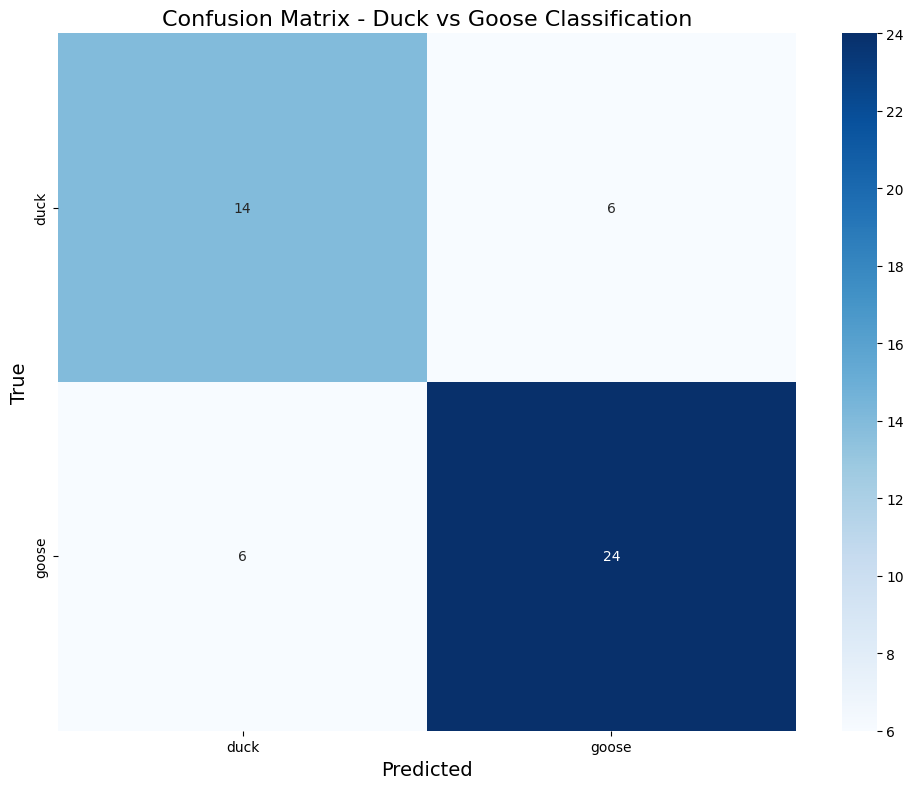

In [202]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = np.unique(y_test)

cm = confusion_matrix(y_test, y_pred, labels=labels)

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('True', fontsize=14)
ax.set_title('Confusion Matrix - Duck vs Goose Classification', fontsize=16)
plt.tight_layout()
plt.show()
